# Б2 Метод главных компонент
    выполнил Сергей Харитонов МИВТ-221

# Задание
Методом главных компонент построить два новых признака для описания объектов из датасета задания Б1 и кластеризовать данные по этим двум признакам на два кластера (любым методом). Сравнить качество кластеризации из задания Б1 и из этого задания.

# Вариант
sales_data.csv
Поля:
- flag:   Была ли совершена покупка
- gender: Пол
- education: Образование
- house_val: Стоимость дома
- age: Возрастная группа
- online: Был ли опыт онлайн покупок
- customer_psy: Переменная, описывающая психологию потребителя в зависимости от района проживания (что бы это ни было)
- marriage: Семейный статус
- child: Есть ли дети
- occupation: Информация о карьере покупателя
- mortgage: Информация о кредите на жилье
- house_owner: В какой собственности дом
- region: Регион проживания
- car_prob: Вероятность того, что клиент купит новый автомобиль
- fam_income: Информация о семейном доходе клиента (A означает самый низкий, а L - самый высокий)


In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

В рамках подготовки данных к прошлой лабораторной работе была добавлена нормализация данных
Так же ради эксперимента были выделены два типа кластеризации:
 - по всем признакам (Кроме региона)
 - по всем признакам (Кроме региона) исключая колонку flag, по которой будет осуществляться оценка точности

In [2]:
# Загрузка данных в память
base_clustered_data = pd.read_csv('clustered_data.csv')

# Выборка данных без разметки кластеров из прошлой лабораторной
# Убираем две последние колонки
# cluster_with_flag (результат кластеризации с колонкой флаг)
# cluster_without_flag (результат кластеризации без колонки флаг)

data = base_clustered_data.iloc[:, :-2]
print(data)

       flag  gender  education  house_val       age  online  customer_psy  \
0       1.0     1.0       1.00   0.075646  0.000000     0.0           0.2   
1       0.0     0.5       0.75   0.021317  1.000000     0.0           0.5   
2       0.0     1.0       0.50   0.011115  0.166667     1.0           0.3   
3       1.0     1.0       0.50   0.035415  0.166667     1.0           0.2   
4       1.0     0.5       0.50   0.011709  0.000000     1.0           1.0   
...     ...     ...        ...        ...       ...     ...           ...   
39995   1.0     0.5       0.75   0.000000  1.000000     1.0           0.3   
39996   0.0     0.5       0.25   0.021360  0.500000     0.0           0.9   
39997   1.0     1.0       0.00   0.013407  0.333333     1.0           0.6   
39998   0.0     1.0       0.25   0.040221  1.000000     1.0           0.5   
39999   0.0     0.5       0.75   0.083603  1.000000     1.0           0.2   

       marriage  child  occupation  mortgage  house_owner  car_prob  \
0   

In [3]:
# Выделение главных компонент
pca = PCA(n_components=2)

pca_data_with_flag = DataFrame(pca.fit_transform(data))
pca_data_without_flag = DataFrame(pca.fit_transform(data.iloc[:, 1:]))

In [4]:
# Кластеризация по PCA
def clusterization(_data: DataFrame) -> DataFrame:
    return _data.assign(
        cluster=
        KMeans(
            n_clusters=2,
            init='random',
            n_init=10,
            random_state=0
        ).fit_predict(_data)
    )


pca_clustered_data_with_flag = clusterization(pca_data_with_flag)
pca_clustered_data_without_flag = clusterization(pca_data_without_flag)

In [5]:
CLUSTERS = [
    # (color, sign)
    ('lightgreen', 's'),
    ('orange', 'o')
]
def visualisation(_data: DataFrame, title: str):
    plt.title(title)
    for cluster in range(2):
        color, sign = CLUSTERS[cluster]
        plt.scatter(
            _data[_data.cluster == cluster][0],
            _data[_data.cluster == cluster][1],
            s=50,
            marker=sign,
            c=color,
            label=f'Кластер {cluster + 1}'
        )
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

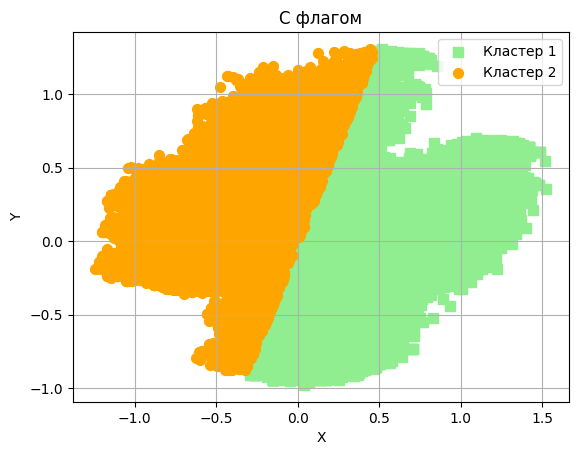

In [6]:
visualisation(pca_clustered_data_with_flag, 'С флагом')

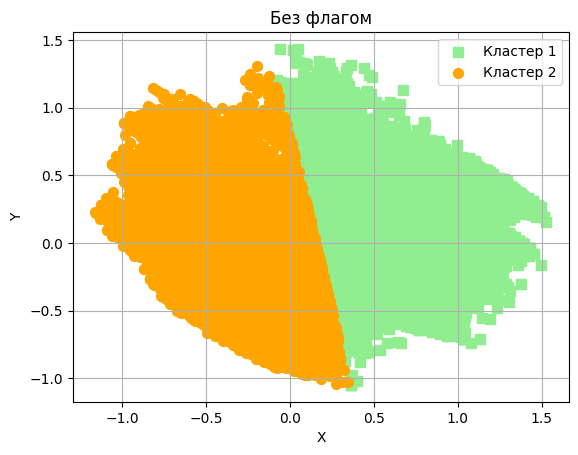

In [7]:
visualisation(pca_clustered_data_without_flag, 'Без флагом')

In [8]:
def accuracy(_data: DataFrame, cluster_field: str = "cluster"):
    _data = _data.assign(flag=data['flag'])
    TP_plus_TN = len(_data[_data.flag == getattr(_data, cluster_field)])
    FP_plus_FN = len(_data[_data.flag != getattr(_data, cluster_field)])
    return TP_plus_TN / (FP_plus_FN + TP_plus_TN)

In [9]:
print('Исходный датасет')
print(f'Точность кластеризации с колонкой флаг {accuracy(base_clustered_data, "cluster_with_flag")}')
print(f'Точность кластеризации без колонки флаг {accuracy(base_clustered_data, "cluster_without_flag")}')

Исходный датасет
Точность кластеризации с колонкой флаг 0.99945
Точность кластеризации без колонки флаг 0.599575


In [10]:
print('Признаки полученные после применения метода главных компонент')
print(f'Точность кластеризации с колонкой флаг {accuracy(pca_clustered_data_with_flag)}')
print(f'Точность кластеризации без колонки флаг {accuracy(pca_clustered_data_without_flag)}')

Признаки полученные после применения метода главных компонент
Точность кластеризации с колонкой флаг 0.950725
Точность кластеризации без колонки флаг 0.616125


### Вывод
Из результатов оценки точности кластеризации видно, что применение метода главных компонент, при наличии метки кластера (flag) привело к снижению точности ввиду большого количества признаков в датасете, а в случае с отсутствием привело к увеличению точности на 2%.